**1. Instal OpenCv**

In [ ]:
!pip install opencv-python

**2. Upload File**

Pada tahap upload file ini akan cukup memakan waktu yang lumayan lama

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format( #
      name=fn, length=len(uploaded[fn])))

Saving archive_2.zip to archive_2.zip
User uploaded file "archive_2.zip" with length 63252113 bytes


**3. Ekstrak File**

In [ ]:
from zipfile import ZipFile
file_name = "archive_2.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print("Done")

Done


**4. Import modul**

In [ ]:
import numpy as np
import cv2
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D
from keras.optimizers import Adam
from keras.layers import MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

**numpy** digunakan untuk operasi numerik pada array multidimensi.

**cv2** adalah library OpenCV yang digunakan untuk pemrosesan gambar.

**Sequential** adalah model keras yang digunakan untuk membangun model secara sequential (lapis demi lapis).

**Adam** adalah optimizer yang digunakan untuk mengoptimasi model.

**ImageDataGenerator** adalah generator yang digunakan untuk melakukan augmentasi gambar pada dataset pelatihan.

**Conv2D** Lapisan konvolusi yang menggunakan 2D convolution untuk mengekstraksi fitur-fitur dari gambar.

**MaxPooling2D** adalah Lapisan pemaksimalan (max pooling) yang mengurangi dimensi spasial gambar dengan mempertahankan fitur yang paling dominan.

**Flatten** adalah Lapisan yang mengubah array multidimensi menjadi array 1D.

**Dense** adalah Lapisan fully connected neural network yang menghubungkan semua neuron dari lapisan sebelumnya dengan neuron pada lapisan ini.

**Dropout** adalah menonaktifkan sebagian neuron selama proses pelatihan untuk mencegah overfitting.

**Dense** adalah Lapisan output dengan neuron sesuai dengan jumlah kelas yang ingin diprediksi.

**5. Atur dataset**

In [ ]:
#diatur lokasi direktori untuk data pelatihan dan data validasi:
train_dir = 'train'
val_dir = 'test'

#Kemudian, objek ImageDataGenerator digunakan untuk melakukan augmentasi dan praproses data gambar. Pada contoh ini, nilai piksel gambar akan diubah ke dalam rentang 0 hingga 1 dengan rescale=1./255.
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

#Pada generator data pelatihan (train_generator), diatur sebagai berikut:
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(48,48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

#Pada generator data validasi (validation_generator), diatur sebagai berikut:
validation_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(48,48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.



**train_dir** adalah direktori tempat gambar-gambar pelatihan disimpan.
target_size=(48,48) menentukan ukuran gambar yang diharapkan pada dataset pelatihan.

**batch_size=64** menentukan jumlah sampel gambar dalam setiap batch yang dihasilkan.

**color_mode="grayscale"** menentukan bahwa gambar akan diubah menjadi skala abu-abu (grayscale).

**class_mode='categorical'** menunjukkan bahwa data pelatihan memiliki label dalam bentuk kategori.

**6. pembangunan model CNN pada jaringan syaraf**

Dengan penambahan lapisan-lapisan ini, model CNN telah terbentuk dengan arsitektur yang mencakup lapisan-lapisan konvolusi, pemaksimalan, dropout, dan fully connected.

In [ ]:
emotion_model = Sequential() #Model ini digunakan untuk membangun model secara sequential, dengan lapisan-lapisan yang ditambahkan satu per satu.
emotion_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1))) #Lapisan ini memiliki 32 filter dengan ukuran kernel 3x3, menggunakan fungsi aktivasi ReLU, dan menerima input dengan dimensi (48, 48, 1) yang merupakan ukuran gambar grayscale.
emotion_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu')) #Lapisan ini memiliki 64 filter dengan ukuran kernel 3x3, menggunakan fungsi aktivasi ReLU.
emotion_model.add(MaxPooling2D(pool_size=(2, 2))) #Lapisan ini menggunakan pemaksimalan (max pooling) dengan ukuran pool 2x2 untuk mengurangi dimensi gambar.
emotion_model.add(Dropout(0.25)) #Lapisan dropout ini akan secara acak menonaktifkan 25% neuron pada lapisan sebelumnya selama proses pelatihan untuk mencegah overfitting.
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu')) #Lapisan ini memiliki 128 filter dengan ukuran kernel 3x3, menggunakan fungsi aktivasi ReLU.
emotion_model.add(MaxPooling2D(pool_size=(2, 2))) #Lapisan ini menggunakan pemaksimalan (max pooling) dengan ukuran pool 2x2.
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu')) #Lapisan ini memiliki 128 filter dengan ukuran kernel 3x3, menggunakan fungsi aktivasi ReLU.
emotion_model.add(MaxPooling2D(pool_size=(2, 2))) #Lapisan ini menggunakan pemaksimalan (max pooling) dengan ukuran pool 2x2.
emotion_model.add(Dropout(0.25)) #Lapisan dropout ini akan secara acak menonaktifkan 25% neuron pada lapisan sebelumnya selama proses pelatihan.
emotion_model.add(Flatten()) #Lapisan ini akan mengubah array multidimensi menjadi array 1D.
emotion_model.add(Dense(1024, activation='relu')) #Lapisan ini memiliki 1024 neuron dengan fungsi aktivasi ReLU.
emotion_model.add(Dropout(0.5)) #Lapisan dropout ini akan secara acak menonaktifkan 50% neuron pada lapisan sebelumnya selama proses pelatihan.
emotion_model.add(Dense(7, activation='softmax')) #Lapisan ini memiliki 7 neuron yang sesuai dengan jumlah kelas emosi yang ingin diprediksi, dan menggunakan fungsi aktivasi softmax untuk mendapatkan probabilitas prediksi emosi yang valid.


**7.  pelatihan model CNN yang telah dibangun**

Untuk menjalankan runningan coding ke-7 ini akan sangat lama jika tidak menggunakan gpu, maka dari itu sebelum menjalankan runningan ini ubah jenis runtimenya menjadi gpu agar berjalan lancar.

In [ ]:
#Tahap kompilasi model:
emotion_model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.0001, decay=1e-6),metrics=['accuracy'])

#Tahap pelatihan model:
emotion_model_info = emotion_model.fit_generator(
        train_generator,
        steps_per_epoch=28709 // 64,
        epochs=50,
        validation_data=validation_generator,
        validation_steps=7178 // 64)

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
<ipython-input-7-0d7e8de965d1>:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  emotion_model_info = emotion_model.fit_generator(


Epoch 1/50
448/448 [==============================] - 28s 35ms/step - loss: 1.7877 - accuracy: 0.2685 - val_loss: 1.6863 - val_accuracy: 0.3590
Epoch 2/50
448/448 [==============================] - 16s 36ms/step - loss: 1.6083 - accuracy: 0.3754 - val_loss: 1.5229 - val_accuracy: 0.4202
Epoch 3/50
448/448 [==============================] - 15s 34ms/step - loss: 1.5123 - accuracy: 0.4175 - val_loss: 1.4465 - val_accuracy: 0.4468
Epoch 4/50
448/448 [==============================] - 17s 38ms/step - loss: 1.4422 - accuracy: 0.4501 - val_loss: 1.3928 - val_accuracy: 0.4678
Epoch 5/50
448/448 [==============================] - 16s 35ms/step - loss: 1.3853 - accuracy: 0.4731 - val_loss: 1.3473 - val_accuracy: 0.4929
Epoch 6/50
448/448 [==============================] - 15s 34ms/step - loss: 1.3341 - accuracy: 0.4933 - val_loss: 1.3075 - val_accuracy: 0.5050
Epoch 7/50
448/448 [==============================] - 16s 35ms/step - loss: 1.2950 - accuracy: 0.5073 - val_loss: 1.2702 - val_accuracy:

**1 Tahap Kompilasi Model**

**loss**='categorical_crossentropy' menentukan fungsi loss yang digunakan untuk mengukur kesalahan prediksi model dalam klasifikasi multikelas.

**optimizer**=Adam(lr=0.0001, decay=1e-6) menggunakan optimizer Adam dengan learning rate (lr) 0.0001 dan penurunan (decay) sebesar 1e-6.

**metrics**=['accuracy'] menentukan metrik yang digunakan untuk mengukur kinerja model, dalam hal ini menggunakan akurasi.

**2 Tahap Pelatihan Model**

**train_generator** adalah generator data pelatihan yang telah dibuat sebelumnya.

**steps_per_epoch**=28709 // 64 menentukan jumlah batch yang akan diproses pada setiap epoch pelatihan. 28709 adalah jumlah total sampel pelatihan dan 64 adalah ukuran batch yang telah ditentukan sebelumnya.

**epochs**=50 menentukan jumlah epoch (iterasi) yang akan digunakan dalam pelatihan.

**validation_data**=validation_generator adalah generator data validasi yang telah dibuat sebelumnya.

**validation_steps**=7178 // 64 menentukan jumlah batch yang akan diproses pada setiap epoch validasi. 7178 adalah jumlah total sampel validasi dan 64 adalah ukuran batch yang telah ditentukan sebelumnya.

**8. Save Model**

In [ ]:
emotion_model.save('model.h5')

**9. Tahap pengambilan model yang telah dilatih sebelumnya**

In [ ]:
from keras.models import load_model
emotion_model = load_model('model.h5') #model yang telah dilatih dan disimpan sebelumnya dengan nama 'model.h5' dimuat kembali ke dalam variabel emotion_model

**10. Menampilkan visualisasi grafik batang**

In [ ]:
def emotion_analysis(emotions):
    objects = ('Marah', 'Aneh', 'Takut', 'Senang', 'Sedih', 'Terkejut', 'Netral') #object
    y_pos = np.arange(len(objects)) #variabel yang berisi variabel objek diatas

    plt.bar(y_pos, emotions, align='center', alpha=0.5) #grafik batang
    plt.xticks(y_pos, objects) #Mengatur label sumbu x
    plt.ylabel('persentase') #Mengatur label sumbu y
    plt.title('ekpresi wajah') #Mengatur judul grafik

    plt.show() #Menampilkan grafik


**11. implementasi fungsi take_photo**

 yang digunakan untuk mengambil foto menggunakan kamera pada Google Colab menyimpannya dalam file.

In [ ]:
#CODE for Capturing an image on Colab from here: https://colab.research.google.com/notebook#fileId=1OnUy6eFE7XhdfGfAHDCqQxpwueTOj_NO

from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

#Membuat definisi fungsi take_photo:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

**12. Ambil Gambar**

In [ ]:
take_photo()

<IPython.core.display.Javascript object>

'photo.jpg'

**13. Instal Keras**

Keras adalah sebuah pustaka (library) populer untuk pemodelan dan pelatihan jaringan saraf tiruan (neural networks) dalam bahasa pemrograman Python. Keras menyediakan antarmuka tingkat tinggi yang mudah digunakan untuk membangun dan melatih model neural networks dengan cepat.

In [ ]:
!pip install keras

**14. Instal Pillow**

Pillow adalah pustaka yang digunakan untuk manipulasi gambar dalam Python.

In [ ]:
!pip install pillow

**15. Instal tensorflow**


TensorFlow adalah sebuah pustaka (library) open-source yang digunakan untuk pemodelan dan pelatihan jaringan saraf tiruan (neural networks). TensorFlow dikembangkan oleh tim di Google dan merupakan salah satu pustaka deep learning yang paling populer saat ini.

In [ ]:
!pip install tensorflow

**16. penggunaan model untuk memprediksi ekpresi wajah**

OpenCV(4.7.0) /io/opencv/modules/objdetect/src/cascadedetect.cpp:1689: error: (-215:Assertion failed) !empty() in function 'detectMultiScale'

1/1 [==============================] - 0s 79ms/step


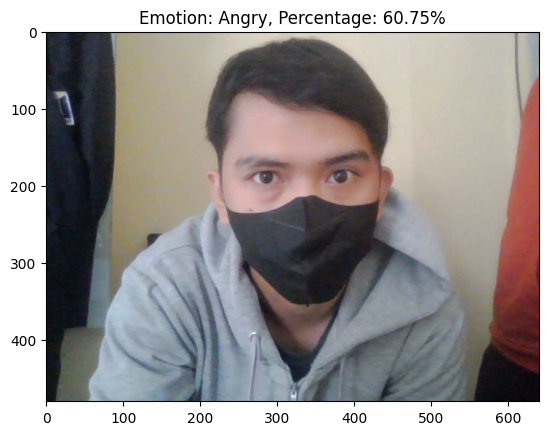

In [ ]:
import cv2
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt

def facecrop(image):
    facedata = '/content/haarcascade_frontalface_alt.xml'
    cascade = cv2.CascadeClassifier(facedata)

    img = cv2.imread(image)

    try:
        minisize = (img.shape[1], img.shape[0])
        miniframe = cv2.resize(img, minisize)

        faces = cascade.detectMultiScale(miniframe)

        for f in faces:
            x, y, w, h = [v for v in f]
            cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

            sub_face = img[y:y+h, x:x+w]

            cv2.imwrite('capture.jpg', sub_face)
            #print("Writing: " + image)

    except Exception as e:
        print(e)

if __name__ == '__main__':
    facecrop('/content/photo.jpg')

    # Load model dan praproses gambar
    model = load_model('model.h5')
    img = load_img('/content/photo.jpg', color_mode="grayscale", target_size=(48, 48))
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x /= 255.0

    # Prediksi emosi
    emotions = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Suprise', 'Neutral']
    custom = model.predict(x)[0]
    max_index = np.argmax(custom)
    emotion_label = emotions[max_index]
    emotion_percentage = round(custom[max_index] * 100, 2)

    # Tampilkan gambar dan persentase emosi
    true_image = load_img('/content/photo.jpg')
    plt.imshow(true_image)
    plt.title(f'Emotion: {emotion_label}, Percentage: {emotion_percentage}%')
    plt.show()
